<a href="https://colab.research.google.com/github/ArthAgrawal/Fashion/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Tensorflow 2.0
import tensorflow as tf

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
fashion_mnist_classes = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot',
}

# Print the dictionary
print(fashion_mnist_classes)


{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


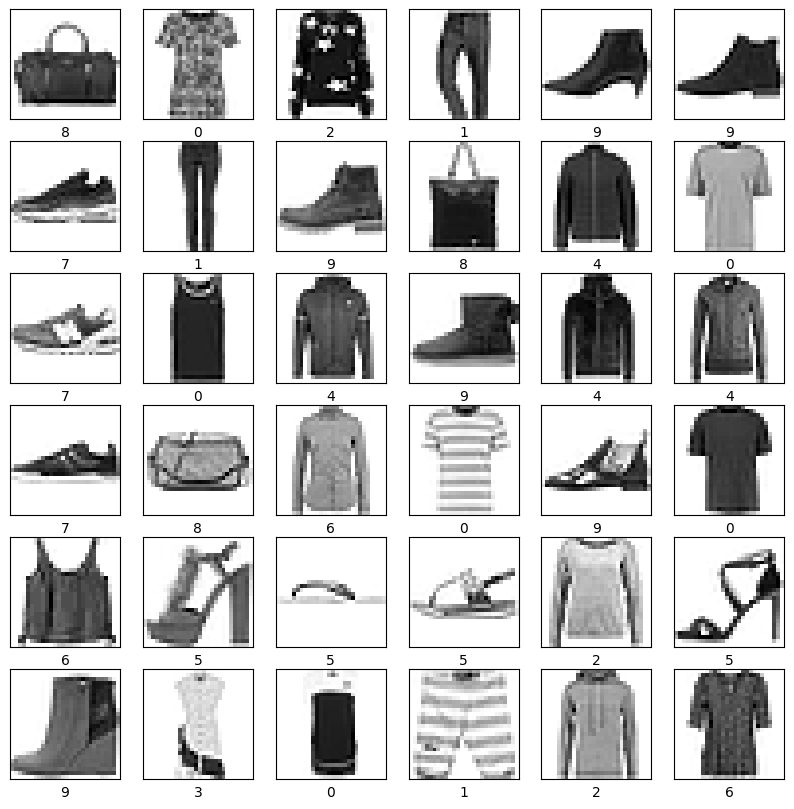

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [8]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Define the first convolutional layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

        # Define the first max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        # Define the second max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification probabilities
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())


1/1 [==============================] - 0s 248ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 de

In [9]:
# Define the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0890 - accuracy: 0.9660 - val_loss: 0.3166 - val_accuracy: 0.9068
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0772 - accuracy: 0.9716 - val_loss: 0.3528 - val_accuracy: 0.9111
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0710 - accuracy: 0.9735 - val_loss: 0.3442 - val_accuracy: 0.9142
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0625 - accuracy: 0.9764 - val_loss: 0.4068 - val_accuracy: 0.9029
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0570 - accuracy: 0.9784 - val_loss: 0.3953 - val_accuracy: 0.9135
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0504 - accuracy: 0.9814 - val_loss: 0.4054 - val_accuracy: 0.9165
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0481 - accuracy: 0.9820 - val_loss: 0.4261 -

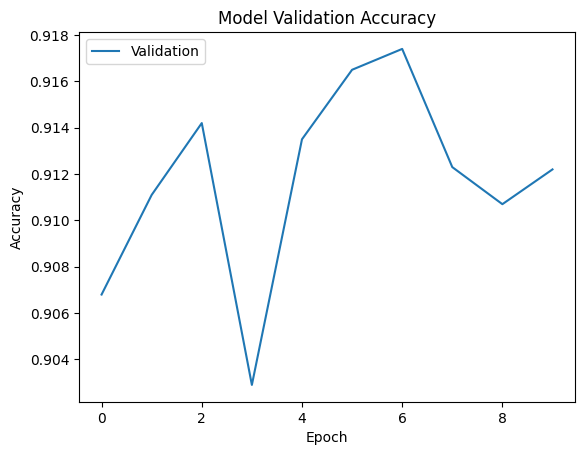

In [11]:
import matplotlib.pyplot as plt

history = cnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [12]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.4595 - accuracy: 0.9122
Test accuracy: 0.9121999740600586


In [17]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


100%|██████████| 14/14 [00:00<00:00, 16.40it/s]


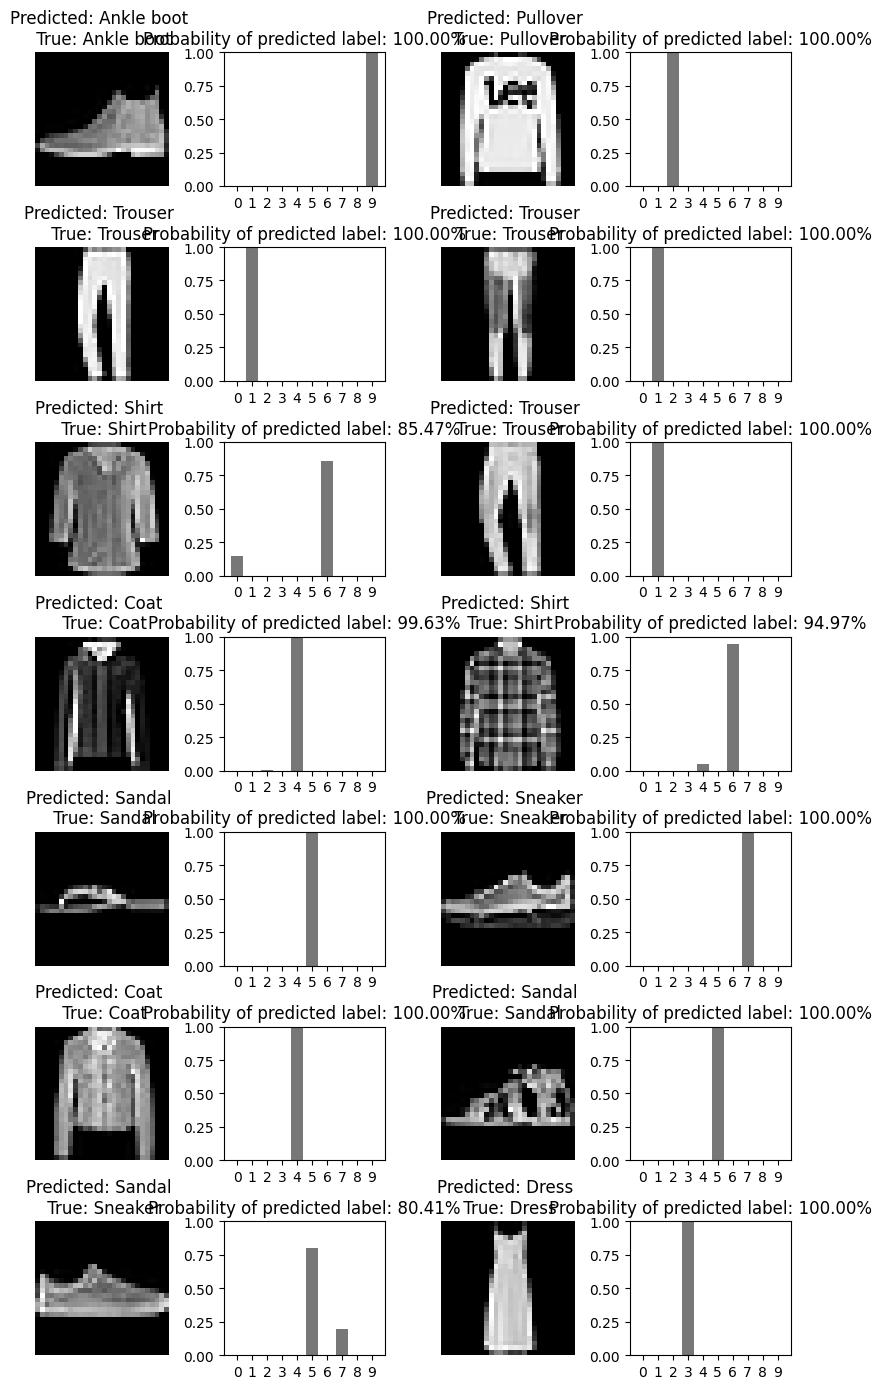

In [21]:
# Import libraries (assuming you have matplotlib and tqdm installed)
import matplotlib.pyplot as plt
from tqdm import tqdm

# ... (rest of your code for building and training the model)

# Fashion MNIST class names dictionary
fashion_mnist_classes = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot',
}

# Plots the first X test images, their predicted class name, and the true class name
num_rows = 7
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.3, hspace=0.5)
for i in tqdm(range(num_images)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Get predicted label and class name
    predicted_label = np.argmax(predictions[i])
    predicted_class_name = fashion_mnist_classes[predicted_label]

    # Get true label and class name
    true_label = test_labels[i]
    true_class_name = fashion_mnist_classes[true_label]

    plt.title("Predicted: {} \n True: {}".format(predicted_class_name, true_class_name))

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(range(10), predictions[i], color="#777777")
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title("Probability of predicted label: {:.2f}%".format(predictions[i][predicted_label]*100))

plt.tight_layout()
plt.show()


In [22]:
# Save the entire model to a file in the new format
cnn_model.save('Fashion_MNIST.keras')

In [ ]:
from google.colab import files
files.download('Fashion_MNIST.keras')